In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\himan\Downloads\TCS_stock_history.csv")

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [7]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB


In [13]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [17]:
print(f"Column number = {df.shape[1]}\nRow number = {df.shape[0]}")

Column number = 8
Row number = 4463


In [19]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


<Axes: xlabel='Date', ylabel='Open'>

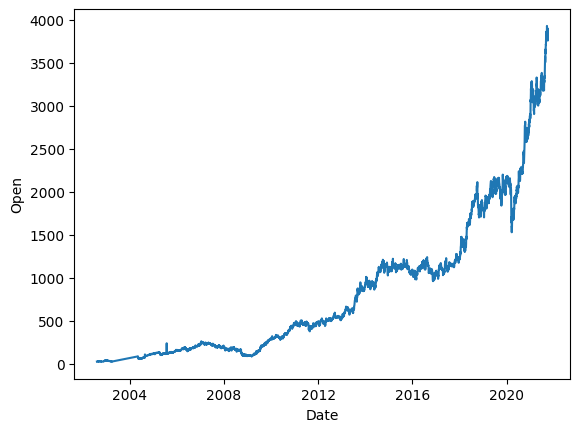

In [37]:
sns.lineplot(x='Date',y='Open',data=df)

<Axes: xlabel='Date', ylabel='Close'>

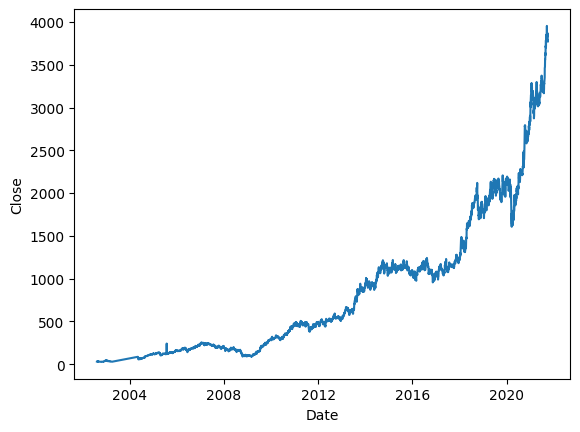

In [35]:
sns.lineplot(x='Date',y='Close',data=df)

<Axes: xlabel='Date', ylabel='Stock Splits'>

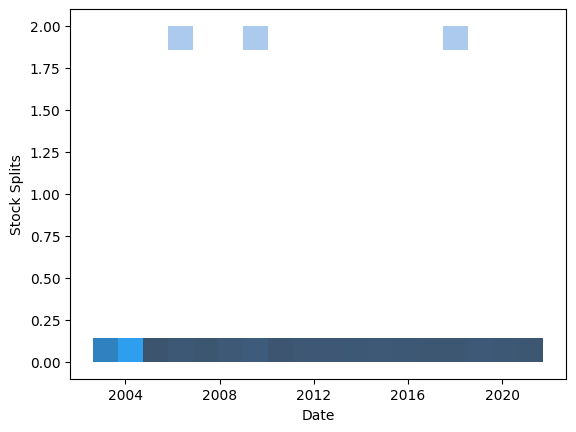

In [51]:
sns.histplot(x='Date',y='Stock Splits',data=df)

<Axes: xlabel='Volume', ylabel='Count'>

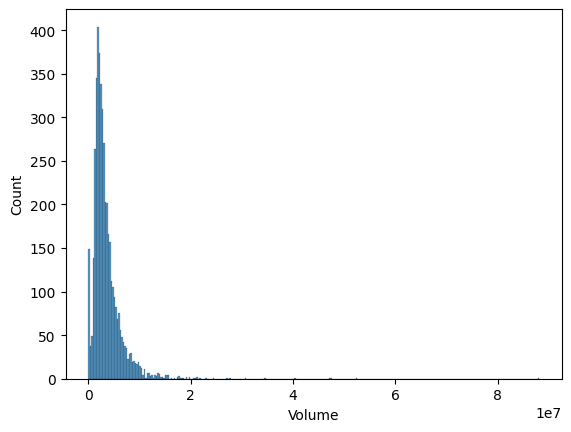

In [55]:
sns.histplot(df['Volume'])

In [61]:
df['Close_lag1']=df['Close'].shift(1)
df['Close_lag2']=df['Close'].shift(2)
df['Target']=df['Close'].shift(-1)
df['MA5']=df['Close'].rolling(5).mean()
df['MA10']=df['Close'].rolling(10).mean()
df['Momentum']=df['Close']-df['Close'].shift(5)
df['Volatility']=df['Close'].rolling(5).std()

In [63]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Close_lag1      1
Close_lag2      2
Target          1
MA5             4
MA10            9
Momentum        5
Volatility      4
dtype: int64

In [69]:
df.dropna(inplace=True)

In [71]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Close_lag1      0
Close_lag2      0
Target          0
MA5             0
MA10            0
Momentum        0
Volatility      0
dtype: int64

In [73]:
X=df[['Open', 'High', 'Low', 'Volume', 'Close_lag1', 'Close_lag2', 'MA5', 'MA10', 'Momentum', 'Volatility']]
y=df['Target']

In [75]:
train_size=int(len(X)*0.8)

X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [77]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)


mse= mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
rs_score=r2_score(y_test,pred)

print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R2 Score:",rs_score)

Mean Squared Error: 1421.2522672973869
Mean Absolute Error: 27.478366731965046
R2 Score: 0.9959865126680936


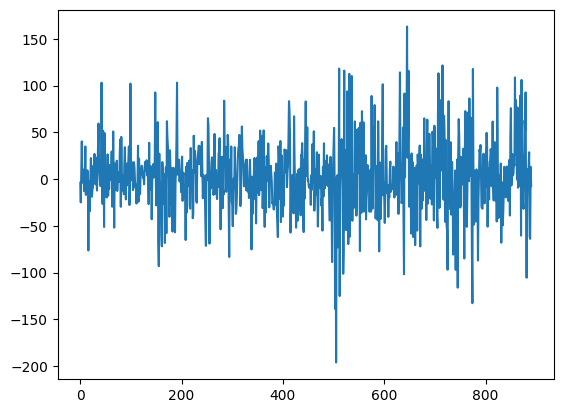

In [79]:
plt.plot(y_test.values - pred)

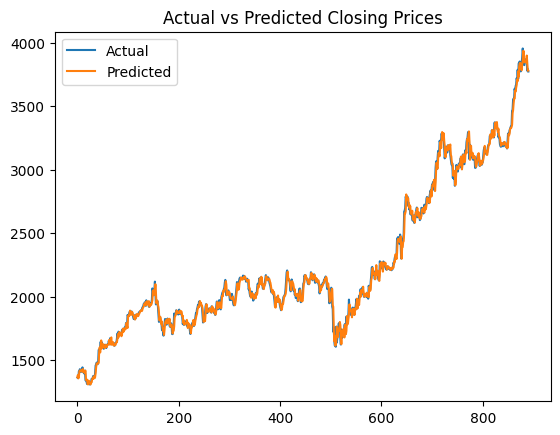

In [83]:
plt.plot(y_test.values, label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [85]:
print("Predicted range:", pred.min(), "to", pred.max())

Predicted range: 1309.6038231545099 to 3935.9480068891166


In [89]:
df['Baseline'] = df['Close'].shift(1)

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Aligning Baseline and Actual Target
baseline_preds = df['Baseline'].iloc[train_size:]
actuals = df['Target'].iloc[train_size:]


baseline_mse = mean_squared_error(actuals, baseline_preds)
baseline_mae = mean_absolute_error(actuals, baseline_preds)

print("Baseline MSE:", baseline_mse)
print("Baseline MAE:", baseline_mae)

Baseline MSE: 2619.463095084401
Baseline MAE: 38.09219815888924


In [95]:
new_train_size = int(len(X)*0.6)
X_train_new,X_test_new=X[:new_train_size],X[new_train_size:]
y_train,y_test_new=y[:new_train_size],y[new_train_size:]

In [99]:
lr_new=LinearRegression()
lr_new.fit(X_train_new,y_train_new)
pred_new=lr_new.predict(X_test_new)

In [101]:
mse_new=mean_squared_error(y_test_new,pred_new)
mae_new=mean_absolute_error(y_test_new,pred_new)
print("Walk-forward MSE: ",mse_new)
print("Walk-forward MAE: ",mae_new)

Walk-forward MSE:  877.5374890719611
Walk-forward MAE:  20.286488881281457


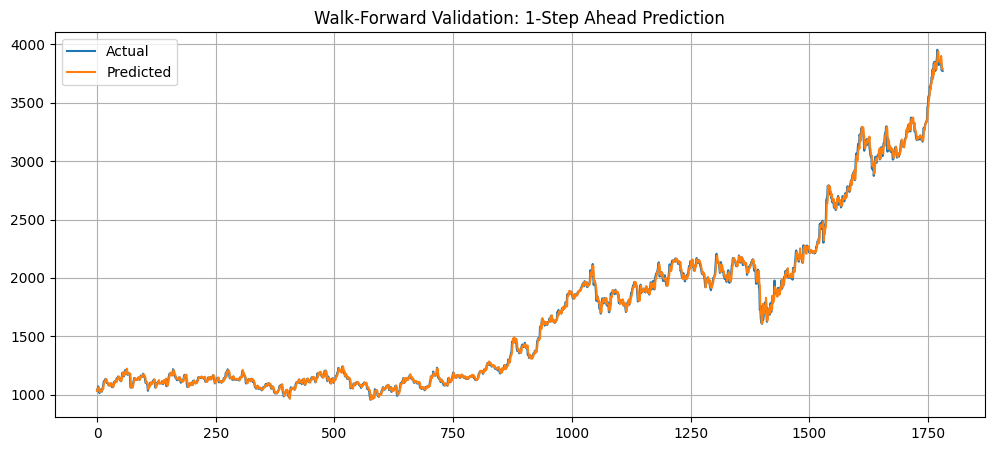

In [143]:
plt.figure(figsize=(12,5))
plt.plot(y_test_new.values if hasattr(y_test_new, 'values') else y_test_new, label='Actual')
plt.plot(pred_new, label='Predicted')
plt.title('Walk-Forward Validation: 1-Step Ahead Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("XGBoost MSE:", mse)
print("XGBoost MAE:", mae)
print("XGBoost R2 Score:", r2)


XGBoost MSE: 965524.3519774541
XGBoost MAE: 683.2770686465348
XGBoost R2 Score: -0.9297016104384515


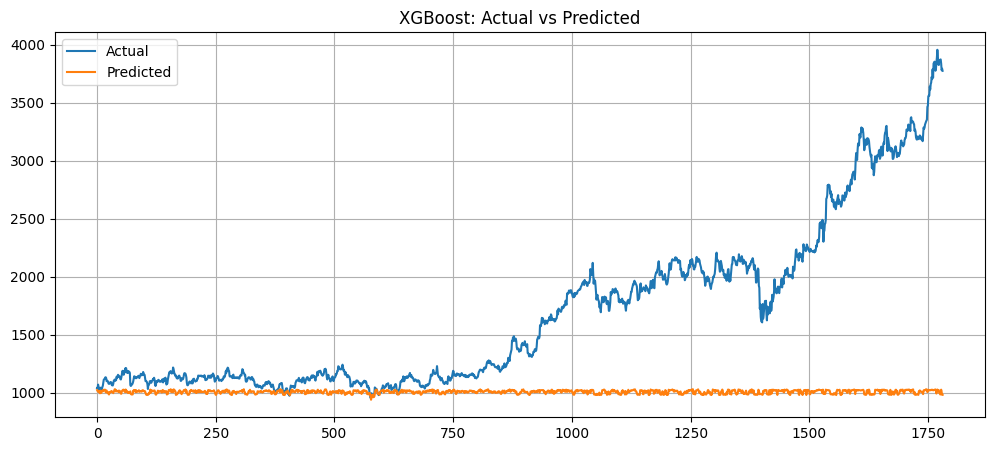

In [151]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(pred, label='Predicted')
plt.title('XGBoost: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

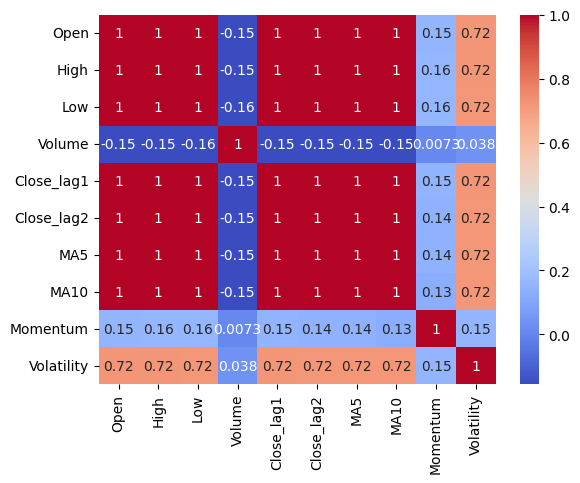

In [153]:
# Check correlation between features
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [155]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions with the best model
pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, pred_best)
mae_best = mean_absolute_error(y_test, pred_best)
r2_best = r2_score(y_test, pred_best)

print("Best XGBoost MSE:", mse_best)
print("Best XGBoost MAE:", mae_best)
print("Best XGBoost R2 Score:", r2_best)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Best XGBoost MSE: 962124.7668969684
Best XGBoost MAE: 680.6533914859314
Best XGBoost R2 Score: -0.9229071833572491


In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-test split
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 3: Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 4: Predict
pred = lr.predict(X_test)

# Step 5: Evaluate
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Scaled LR MSE:", mse)
print("Scaled LR MAE:", mae)
print("Scaled LR R2 Score:", r2)

Scaled LR MSE: 1421.252267293149
Scaled LR MAE: 27.478366731916676
Scaled LR R2 Score: 0.9959865126681055
